<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas`

_Authors: Tim Book, Ng Shu Min_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.


### Lesson Guide

- What is `pandas`?
- Reading data
- Exploring data
    - Filtering
    - Sorting


<a id='introduction'></a>

### What is `pandas`?

---

- Data analysis library - **Panel data system** (doesn't actually have to do with the animal, sorry).
- Created by Wes McKinney and Open Sourced by AQR Capital Management, LLC 2009.
- Implemented in highly optimized Python/Cython.
- Most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.



## Importing the Dynamic Trio
From here on out, we'll begin pretty much all of our notebooks with the following three imports.

* **pandas**: The library we'll be using to do pretty much all data manipulation.
* **numpy**: The library we'll need to do various other computations. Even if you don't think you'll need it to start, you'll probably end up using it later.
* **matplotlib**: The library we'll use most for plotting. More on this another day.


To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

Similarly we will use `np` for numpy and `plt` for the `pyplot` module in `matplotlib`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='loading_csvs'></a>

### Loading a csv into a DataFrame

---

Pandas can load many types of files, but one of the most common filetypes for storing data is in a `.csv` file. Let's load a dataset on UFO sightings from the `./datasets` directory:

In [4]:
ufo = pd.read_csv('datasets/ufo.csv', sep=',')

In [5]:
# check the type of what we have read in
type(ufo)

pandas.core.frame.DataFrame

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will barely scratch the surface of DataFrame functionality in this lesson, but over the course of this class you will become an expert at using them.

<a id='exploring_data'></a>

## Exploratory Data Analysis (EDA) with Python!

---

DataFrames come with built-in functionality that makes data exploration easy. 

Let's start by looking at the "head" of your data with the `.head()` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

In [6]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

We can specify the number of rows we want to see by adding an argument, for example to view 10 rows, use  ```.tail(10)```

In [10]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


<a id='data_dimensions'></a>

### Data dimensions

---

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

In [11]:
ufo.shape

(80543, 5)

You will notice that this is operates the same as `.shape` for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed.

Look at the names of your columns with the ```.columns``` property.

In [12]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

## Selecting a Column

We can select columns in two ways. Either we treat the column as an attribute of the DataFrame or we index the DataFrame for a specific element (in this case, the element is a column name).

#### Column as an Attribute

You can use the bracket syntax just like python dictionaries with the string name of the column to extract that column.Treating the column as an attribute returns a Series of values. 

To refer to a specific column, you can use the column name as a string in the square brackets. 


In [14]:
ufo['City'].head()


0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
Name: City, dtype: object

You can use either single quotes or double quotes in Python to refer to a String.

In [15]:
ufo["City"]

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

We can also use the ```.head()``` function on a single column, which is represented as a pandas Series object.

In [16]:
ufo['Colors Reported'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Colors Reported, dtype: object

You can also access the column of a DataFrame by using the column name as the propery, but only if it matches Python's variable name rules.


In [22]:
# Try to refrain from doing this...
# Why shouldn't you rely on this? (There are several good reasons).
ufo.City

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

#### Indexing the Dataframe

Indexing the DataFrame means we want to access specific columns. In this case we use a *list* of the column names in the brackets to specify the columns that we want.



In [28]:
# Select two columns in a list to index the DataFrame
ufo[['City', 'State', 'Colors Reported']]

,City,State,Colors Reported
0,Ithaca,NY,NaN
1,Willingboro,NJ,NaN
2,Holyoke,CO,NaN
3,Abilene,KS,NaN
4,New York Worlds Fair,NY,NaN
...,...,...,...
80538,Neligh,NE,NaN
80539,Uhrichsville,OH,NaN
80540,Tucson,AZ,RED BLUE
80541,Orland park,IL,RED


<a id='dataframe_series'></a>

### DataFrame vs. Series

---

We've been playing with them, so I guess we should define them formally:

* A **`Series`** is a one-dimensional array of values **with an index**.
* A **`DataFrame`** is a two-dimensional array of values **with both a row and column index**.
* It turns out - each column of a `DataFrame` is actually a `Series`!
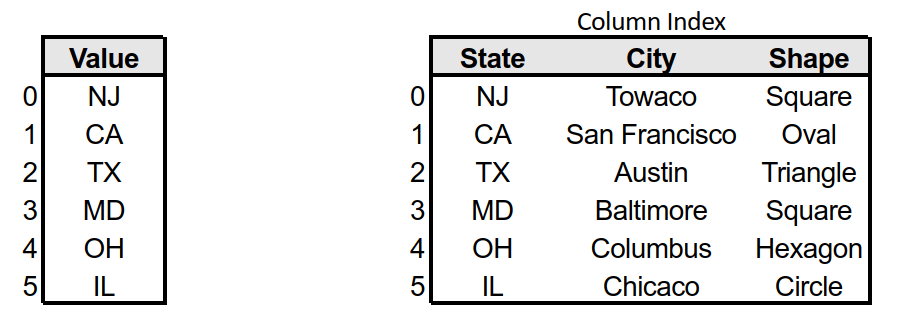


There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [29]:
print(type(ufo['City']))
print(type(ufo[['City']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
# Let's have a look at what is returned to see the difference
#ufo['City']
ufo[['City']]

,City
0,Ithaca
1,Willingboro
2,Holyoke
3,Abilene
4,New York Worlds Fair
...,...
80538,Neligh
80539,Uhrichsville
80540,Tucson
80541,Orland park


<a id='info'></a>

### Examining your data with `.info()`

---

The `.info()` should be the first thing you look at when getting acquainted with a new dataset.

**Types** are very important.  They impact the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and when you can encounter unexpected results.

> _Typical problems when working with new datasets_:
> - Missing values
> - Unexpected types (string/object instead of int/float)
> - Dirty data (commas, dollar signs, unexpected characters, etc)
> - Blank values that are actually "non-null" or single white-space characters

`.info()` is a function that is available on every **DataFrame** object. It gives you information about:

- Name of column / variable attribute
- Type of index (RangeIndex is default)
- Count of non-null values by column / attribute
- Type of data contained in column / attribute
- Unqiue counts of dtypes (Pandas data types)
- Memory usage of our dataset


In [33]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


The `dtypes` property also helps us examine the data types of each of the columns. These data types were automatically inferred by `pandas` when reading in the data set. 

In [34]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

<a id='describe'></a>

## Quick Summaries

---

The `.describe()` function is very useful for taking a quick look at your data. It gives you some of the basic descriptive statistics.




In [75]:
# Let's read in the diamonds data set and check the first few rows
diamonds = pd.read_csv('datasets/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [36]:
# Let's describe the price
diamonds['price'].describe()


count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [41]:
# We can even do it to the whole DataFrame - what does that look like?
# What's missing?
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You can use `.value_counts()` to get a good tabular view of a categorical variable.

In [42]:
# Let's count up the cuts
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [51]:
# Let's do the same thing, but normalized (out of 100%)
diamonds['color'].value_counts(normalize=True)

G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64

In [52]:
diamonds['color'].nunique()

7

We can use `unique()` and `nunique()` to determine the unique values and the number of these unique values for categorical variables.

In [53]:
diamonds['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values 
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

There are built-in math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the `.mean()` function on the `ufo` DataFrame to get the mean for every column.

In [54]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [56]:
diamonds['price'].mean()

3932.799721913237

In [57]:
# Find the median
diamonds['price'].median()

2401.0

In [59]:
# find specific quantiles
diamonds['price'].quantile([0.10,0.25, 0.75,1])

0.10      646.00
0.25      950.00
0.75     5324.25
1.00    18823.00
Name: price, dtype: float64

<a id='independent_practice'></a>

### Now you!

---

Now that we know a little bit about basic DataFrame use, let's practice on a new dataset.

> Pro tip:  You can use the "tab" key to browse filesystem resources when your cursor is in a string to get a relative reference to the files that can be loaded in Jupyter notebook.  Remember, you have to use your arrow keys to navigate the files populated in the UI. 

<img src="https://snag.gy/IlLNm9.jpg">

1. Read in the `cars.csv` dataset. (call it `cars`)
1. What is the mean `mpg` for cars in this dataset?

In [61]:
cars = pd.read_csv('datasets/cars.csv')

In [62]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [63]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [64]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


## Filtering a Dataset

Filtering and sorting are key processes that allow us to drill into the 'nitty gritty' and cross sections of our dataset.

Consider the `diamonds` dataset:

In [67]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64



To filter, we use a process called **Boolean Filtering**, wherein we define a Boolean condition, and use that Boolean condition as a **mask** to filter on our DataFrame.

In [66]:
# which rows have carat value > 0.50? 
diamonds['carat']>0.50

0        False
1        False
2        False
3        False
4        False
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: carat, Length: 53940, dtype: bool

Now we can use that 'mask' from above, and apply it to our full dataframe. Every time we have a `True` in a row, we return the row. If we have a `False` in that row, we do not return it. The result is a dataframe that only has rows where the mask had a value of `True`.

In [69]:
diamonds[diamonds['carat']>0.50].head()

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
92,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
93,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
94,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72


In [82]:
# Find the diamonds with color E

# first set the condition
diamonds_with_E_color = diamonds['color']=='E' 

# use the condition as a boolean mask on the data frame
E_diamonds_only = diamonds[diamonds_with_E_color]

# find the mean price of the filtered data
mean_price_of_E_diamond = E_diamonds_only['price'].mean()

print(mean_price_of_E_diamond)

3076.7524752475247


### Quick Exercise

Let's calculate the **mean carat weight** for diamonds with `cut` **Premium**
> Think: What are the component parts of this problem?

In [91]:
diamonds[diamonds['cut']=='Premium']['carat'].mean()

AttributeError: 'float' object has no attribute 'round'

In [83]:
# First find the diamonds where the cut == 'Premium'
# Then select the 'carat' column as a series
# Finally, find the mean
diamonds[diamonds['cut']=='Premium']

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


## Filtering on Multiple Conditions

We can also filter on _multiple conditions_. 
The format for multiple conditions is:

`df[ (df['col1'] == value1) & (df['col2'] == value2) ]`

Or, more simply:

`df[ (CONDITION 1) & (CONDITION 2) ]`

Which eventually may evaluate to something like:

`df[ True & False ]`

...on a row-by-row basis. If the end result is `False`, the row is omitted.

_Don't forget parentheses in your conditions!_ This is a common mistake.

In [94]:
# Before, we filtered on rows where the cut was 'Premium'. 
# We also filtered where carat weight was more than 0.50. 
# Let's see what happens when we filter on *both* simultaneously.
# Find all diamonds where the cut is Premium AND the carat weight is greater than 0.50
# "And" logic - use ampersand (&)
# Note parentheses mandatory!
diamonds[(diamonds['cut']=='Premium') & (diamonds['carat']>0.5)]

,carat,cut,color,clarity,depth,table,price,x,y,z
99,0.80,Premium,H,SI1,61.5,58.0,2760,5.97,5.93,3.66
101,0.75,Premium,E,SI1,59.9,54.0,2760,6.00,5.96,3.58
103,0.75,Premium,G,VS2,61.7,58.0,2760,5.85,5.79,3.59
106,0.80,Premium,G,SI1,63.0,59.0,2760,5.90,5.81,3.69
112,0.90,Premium,I,VS2,63.0,58.0,2761,6.16,6.12,3.87
...,...,...,...,...,...,...,...,...,...,...
53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


In [95]:
# What about diamonds where the cut is Premium OR the carat weight is greater than 0.50?
# "Or" logic - use pipe (|)
diamonds[(diamonds['cut']=='Premium')| (diamonds['carat']>0.5)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Quick Exercise

Find all the ufo sightings in Hollywood, CA. 


In [97]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [98]:
ufo[(ufo['City']=='Hollywood') & (ufo['State']=='CA')]

,City,Colors Reported,Shape Reported,State,Time
1764,Hollywood,NaN,OTHER,CA,12/15/1968 23:00
3126,Hollywood,NaN,DISK,CA,12/1/1975 4:00
7976,Hollywood,NaN,CIGAR,CA,3/30/1995 5:30
11461,Hollywood,ORANGE,LIGHT,CA,4/23/1998 18:00
12188,Hollywood,GREEN,FIREBALL,CA,9/23/1998 20:55
12324,Hollywood,NaN,VARIOUS,CA,10/10/1998 2:30
13633,Hollywood,NaN,CIRCLE,CA,6/6/1999 19:00
14093,Hollywood,NaN,OTHER,CA,8/2/1999 2:00
15962,Hollywood,NaN,LIGHT,CA,2/24/2000 23:00
18091,Hollywood,NaN,SPHERE,CA,12/7/2000 10:50


#### Other useful functions for filtering

In [99]:
cars[cars['mpg'].between(24, 30)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,24.4,4,146.7,62,3.69,3.190,20.0,1,0,4,2
25,27.3,4,79.0,66,4.08,1.935,18.9,1,1,4,1
26,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2


In [100]:
cars[~cars['mpg'].between(14, 31)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4


In [102]:
ufo[ufo['City'].isin(['Towaco', 'Montville','Hollywood','Los Angeles'])]

,City,Colors Reported,Shape Reported,State,Time
16,Los Angeles,NaN,NaN,CA,2/25/1942 0:00
102,Los Angeles,NaN,CIRCLE,CT,6/4/1949 10:00
151,Los Angeles,NaN,DISK,CA,2/15/1951 11:00
228,Los Angeles,NaN,FIREBALL,CA,4/15/1953 12:00
289,Los Angeles,RED,CIRCLE,CA,7/1/1954 22:00
...,...,...,...,...,...
78190,Los Angeles,NaN,CIRCLE,CA,6/14/2014 18:45
78299,Los Angeles,RED GREEN,LIGHT,CA,6/18/2014 2:25
78624,Los Angeles,NaN,CHEVRON,CA,6/29/2014 1:48
79497,Los Angeles,NaN,LIGHT,CA,7/24/2014 1:54


In [103]:
# Indexing a dataframe
diamonds[['cut','color']]

,cut,color
0,Ideal,E
1,Premium,E
2,Good,E
3,Premium,I
4,Good,J
...,...,...
53935,Ideal,D
53936,Good,D
53937,Very Good,D
53938,Premium,H


In [105]:
diamonds[diamonds['cut']=='Ideal'][['cut','color']]

,cut,color
0,Ideal,E
11,Ideal,J
13,Ideal,J
16,Ideal,I
39,Ideal,I
...,...,...
53925,Ideal,I
53926,Ideal,E
53929,Ideal,G
53935,Ideal,D


<a id='indexing'></a>

## Pandas Indexing: `.loc` and `.iloc`

---

So far we've learned how to select both rows and columns. The savvy and skeptical student would have noticed a problem here. We have ambiguous notation! What does this do:

```python
data[something]
```

We can't tell! Is `something` a mask or a string? One selects rows, the other selects columns. 


In [ ]:
# indexing by selecting columns
diamonds[['carat','price']]

In [ ]:
# using boolean mask to select rows
diamonds[diamonds['cut']=='Premium']

**What if we wanted to filter rows and select columns at the same time?!**

Pandas has two properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> There used to be a third, `.ix` which is now deprecated and shan't ever be used again.

## `.loc` is Most Common
The syntax of `.loc` is pretty intuitive:

```python
data.loc[rows, columns]
```

Where `rows` is often a filter (ie, a **mask**), and `columns` is a list of columns, or even just `:` to select all columns.

In [106]:
# Choose rows with Premium cut and show only the carat and price
diamonds.loc[diamonds['cut']=='Premium', ['carat','price']]

,carat,price
1,0.21,326
3,0.29,334
12,0.22,342
14,0.20,345
15,0.32,345
...,...,...
53928,0.79,2756
53930,0.71,2756
53931,0.71,2756
53934,0.72,2757


In [ ]:
# Select all columns 
# What is this similar to?
diamonds.loc[diamonds['cut']=='Premium', :]

In [140]:
diamonds.loc[[1,3],['carat','cut']]

,carat,cut
1,0.21,Premium
3,0.29,Premium


In [141]:
diamonds.loc[0:4, ['carat','cut']]

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


In [142]:
diamonds.iloc[0:4,0:1]

,carat
0,0.23
1,0.21
2,0.23
3,0.29


In [147]:
diamonds.loc[0:4,['carat','cut']]

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


In [149]:
df = diamonds.iloc[2:5,[0,1]]

In [159]:
df.iloc[:,[0]]

,carat
2,0.23
3,0.29
4,0.31


In [117]:
my_list=['a','b','c','d','e','f']

In [130]:
start=0
end = 5
my_list[start:end]


['a', 'b', 'c', 'd', 'e']

In [136]:
my_list[::]

['a', 'b', 'c', 'd', 'e', 'f']

In [ ]:
diamonds.loc[:, ['carat', 'cut']]

### Acccctually.....

You can see that using : to select all columns or rows is similar to using the boolean mask or indexing by column.

According to **_The Zen of Python_**, explicit is better than implicit. `.loc` is explicit. **Most people choose to always use `.loc` instead of the ambiguous `data[something]` notation! This is a pretty good idea! When in doubt, use `.loc`!**

### `.iloc` is rare, but useful
The `i` stands for "integer" and will give you the actual zero-indexed numerical indices.

Remember that Python list indexing using **_start:stop:step_** will use the element with index _start_, until just before _stop_ with each _step_ between the _start_ and _stop_

In [160]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [162]:
# Selecting rows 0 to 2 and all alternating columns
cars.iloc[3:, ::2]

,mpg,disp,drat,qsec,am,carb
3,21.4,258.0,3.08,19.44,0,1
4,18.7,360.0,3.15,17.02,0,2
5,18.1,225.0,2.76,20.22,0,1
6,14.3,360.0,3.21,15.84,0,4
7,24.4,146.7,3.69,20.00,0,2
8,22.8,140.8,3.92,22.90,0,2
9,19.2,167.6,3.92,18.30,0,4
10,17.8,167.6,3.92,18.90,0,4
11,16.4,275.8,3.07,17.40,0,3
12,17.3,275.8,3.07,17.60,0,3


In [163]:
# Selecting rows 0 to 2 and columns 3 to 5
cars.iloc[:3, 3:6]

,hp,drat,wt
0,110,3.90,2.620
1,110,3.90,2.875
2,93,3.85,2.320


## Sorting

In [168]:
# We can sort individual Series...
cars['mpg'].sort_values()

15    10.4
14    10.4
23    13.3
6     14.3
16    14.7
30    15.0
13    15.2
22    15.2
21    15.5
28    15.8
11    16.4
12    17.3
10    17.8
5     18.1
4     18.7
9     19.2
24    19.2
29    19.7
0     21.0
1     21.0
3     21.4
31    21.4
20    21.5
8     22.8
2     22.8
7     24.4
26    26.0
25    27.3
27    30.4
18    30.4
17    32.4
19    33.9
Name: mpg, dtype: float64

In [169]:
cars['mpg'].sort_values(ascending=False).head()

19    33.9
17    32.4
27    30.4
18    30.4
25    27.3
Name: mpg, dtype: float64

In [180]:
# Or the entire DataFrame by the specific column
cars.sort_values('disp',ascending=False)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
24,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
22,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2


In [183]:
# Or the entire DataFrame by more than one column using lists
cars.sort_values(by=['cyl','mpg'], ascending=[False,True])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
13,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
22,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


## Another quick exercise

Can you find the 5 most recent ufo sightings in Roswell, New Mexico (NM)? 
First we will convert the `Time` column into a `datetime` object.

In [185]:
ufo.Time = pd.to_datetime(ufo.Time)

In [186]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [189]:
# Give me the 5 most recent UFO sightings in Roswell, New Mexico (NM).
# You'll need to filter and use .sort_values()
# This is a hard one!
ufo[(ufo['City']=='Roswell')&(ufo['State']=='NM')].sort_values('Time',ascending=False).head()

,City,Colors Reported,Shape Reported,State,Time
80459,Roswell,ORANGE,CIRCLE,NM,2014-09-01 20:00:00
80056,Roswell,NaN,OTHER,NM,2014-08-18 15:00:00
67040,Roswell,NaN,FLASH,NM,2012-11-08 22:30:00
58960,Roswell,NaN,LIGHT,NM,2011-09-04 19:50:00
55978,Roswell,NaN,EGG,NM,2011-01-16 14:30:00


## Homework / Review

Consider the Superstore dataset, which consist of a two tables stored as .csv files.

- Products Table (products.csv)
- Orders Table (orders.csv)

The Products Table contains the following attributes:

- **product_id** - 	The unique identifier value for the product in the order.
- **category** - 	The product's highest level category.
- **sub_category** - 	The classification of the product within the high-level category.
- **product_name** - 	The name of the product.
- **product_cost_to_consumer** - 	The cost of each product on a single quantity basis.

Q1. Read in the products.csv file that is in the `datasets` directory into a DataFrame called `products`.



In [ ]:
#Q1 Answer here


Q2. Print the first 4 rows of the `products` DataFrame.


In [ ]:
#Q2 answer here


Q3. Identify the shape of the `products` DataFrame (how many rows and columns?)


In [ ]:
#Q3 answer here


Q4. How many products of each category are there?

In [ ]:
#Q4 Answer here


Q5. What is the mean product cost to consumer for all products?

Q6. What is the mean product cost to consumer for products in the category 'Furniture'?

Q7. What are the top 10 products with the highest product cost to consumer containing the word "Recycled" or "Green" in the product name?
Return your answer as a DataFrame object.

In [191]:
products = pd.read_csv('datasets/products.csv')

In [192]:
orders = pd.read_csv('datasets/orders.csv')

In [193]:
products.head()

,product_id,category,sub_category,product_name,product_cost_to_consumer
0,FUR-BO-10000008,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51
1,FUR-BO-10000021,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50
2,FUR-BO-10000035,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04
3,FUR-BO-10000071,Furniture,Bookcases,"Safco 3-Shelf Cabinet, Metal",89.22
4,FUR-BO-10000087,Furniture,Bookcases,"Dania Classic Bookcase, Mobile",392.64


In [194]:
orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,profit_margin
0,ID-2022-83625,28/07/2022,31/07/2022,Second Class,RS-19420,FUR-BO-10000008,465.156,2,0.4,-255.864,-0.55
1,IN-2020-85480,31/07/2020,02/08/2020,First Class,CS-12490,FUR-BO-10000021,243.060,2,NaN,102.060,NaN
2,IN-2020-21206,07/02/2020,12/02/2020,NaN,SC-20800,FUR-BO-10000035,1236.330,3,0.0,519.210,NaN
3,IN-2019-50060,07/09/2019,14/09/2019,NaN,MC-17575,FUR-BO-10000035,2472.660,6,NaN,1038.420,NaN
4,IN-2019-25889,08/12/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.293,7,0.1,923.013,NaN


In [195]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10923 entries, 0 to 10922
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10923 non-null  object 
 1   order_date     10923 non-null  object 
 2   ship_date      10923 non-null  object 
 3   ship_mode      10919 non-null  object 
 4   customer_id    10923 non-null  object 
 5   product_id     10923 non-null  object 
 6   sales          10923 non-null  float64
 7   quantity       10923 non-null  int64  
 8   discount       10899 non-null  float64
 9   profit         10923 non-null  float64
 10  profit_margin  10912 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 938.8+ KB


## Recap

We covered a lot of ground! It's ok if this takes a while to gel.

```python

# basic DataFrame operations
df.head()
df.tail()
df.shape
df.columns
df.Index
df.info()

# selecting columns
df.column_name
df['column_name']
df[['column_name1','column_name2','column_name3']]

# notable columns operations
df.describe() # five number summary
df['col1'].nunique() # number of unique values
df['col1'].value_counts() # number of occurrences of each value in column

# filtering
df[ df['col1'] < 50 ] # filter column to be less than 50
df[ (df['col1'] == value1) & (df['col2'] > value2) ] # filter column where col1 is equal to value1 AND col2 is greater to value 2

# sorting
df.sort_values(by='column_name', ascending = False) # sort biggest to smallest

```


It's common to refer back to your own code *all the time.* Don't hesistate to reference this guide! 🐼
